# Reversing a List (Transformer Code)

### Setup

This notebook covers the experimentation of Chapter 4 and Chapter 5. To avoid repeating code I have one set of code for training with Adam and one for SGD. Upon completing a simulation I would save the results to a .npy file that could later be loaded form graph creation.

### Code for imports and training and testing.

In [ ]:
from ReverseTransformer import SimpleTransformer,ReverseDataset,collate_fn,create_padding_mask
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np

In [ ]:
dataset1 = ReverseDataset(num_samples=1000, min_seq_len=5, max_seq_len=50, vocab_size=50)
dataloader1 = DataLoader(dataset1, batch_size=100, shuffle=True, collate_fn=collate_fn)
dataset2 = ReverseDataset(num_samples=1000, min_seq_len=5, max_seq_len=50, vocab_size=50)
dataloader2 = DataLoader(dataset2, batch_size=100, shuffle=True, collate_fn=collate_fn)

### Adam Training and Testing

Below is the code for the training of the Adam optimizer where the hyperparameters were edited depending on the Transformer we wished to train.

In [ ]:
#Hyperparameters
vocab_size = 50
seq_len = 15
batch_size = 100
epochs = 5000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
d_model=16
nhead=1
num_layers=2
ff=16
max_seq_len = 15

epochs=20000

#model defined
model = SimpleTransformer(vocab_size,d_model=d_model,ff=ff,nhead=nhead,num_layers=num_layers).to(device)

#Optimizer and Loss chosen
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

#Result Arrays
TrainErrorAdam = []
TestErrorAdam=[]

for epoch in range(epochs):

    # Training Phase
    model.train()
    total_loss = 0
    for batch in dataloader1:
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)
        pad_mask = create_padding_mask(inputs).to(device)
        optimizer.zero_grad()
        outputs = model(inputs, src_key_padding_mask=pad_mask)  # (batch_size, seq_len, vocab_size)
        loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_train_loss = total_loss / len(dataloader1)

    # Validation Phase
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch in dataloader2:
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)
            pad_mask = create_padding_mask(inputs).to(device)   
            outputs = model(inputs, src_key_padding_mask=pad_mask)
            loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
            test_loss += loss.item()
    avg_test_loss = test_loss / len(dataloader2)
    
    #Store Results

    TrainErrorAdam.append(avg_train_loss)
    TestErrorAdam.append(avg_test_loss)

    #Output for validation.
    if epoch%100==0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_train_loss:3g}")
        print(f"Epoch [{epoch+1}/{epochs}], Test Loss: {avg_test_loss:.3g}")




Epoch [1/20000], Loss: 3.8429
Epoch [1/20000], Test Loss: 3.72
Epoch [101/20000], Loss: 2.17291
Epoch [101/20000], Test Loss: 2.13
Epoch [201/20000], Loss: 2.11736
Epoch [201/20000], Test Loss: 2.09
Epoch [301/20000], Loss: 2.06781
Epoch [301/20000], Test Loss: 2.03
Epoch [401/20000], Loss: 2.00033
Epoch [401/20000], Test Loss: 1.95
Epoch [501/20000], Loss: 1.92051
Epoch [501/20000], Test Loss: 1.82
Epoch [601/20000], Loss: 1.85027
Epoch [601/20000], Test Loss: 1.71
Epoch [701/20000], Loss: 1.80882
Epoch [701/20000], Test Loss: 1.62
Epoch [801/20000], Loss: 1.755
Epoch [801/20000], Test Loss: 1.54
Epoch [901/20000], Loss: 1.71669
Epoch [901/20000], Test Loss: 1.48
Epoch [1001/20000], Loss: 1.69091
Epoch [1001/20000], Test Loss: 1.44
Epoch [1101/20000], Loss: 1.66899
Epoch [1101/20000], Test Loss: 1.4
Epoch [1201/20000], Loss: 1.64575
Epoch [1201/20000], Test Loss: 1.35
Epoch [1301/20000], Loss: 1.62079
Epoch [1301/20000], Test Loss: 1.31
Epoch [1401/20000], Loss: 1.58634
Epoch [1401/20

Epoch [11701/20000], Loss: 1.1052
Epoch [11701/20000], Test Loss: 0.483
Epoch [11801/20000], Loss: 1.11369
Epoch [11801/20000], Test Loss: 0.548
Epoch [11901/20000], Loss: 1.10456
Epoch [11901/20000], Test Loss: 0.513
Epoch [12001/20000], Loss: 1.10716
Epoch [12001/20000], Test Loss: 0.505
Epoch [12101/20000], Loss: 1.10327
Epoch [12101/20000], Test Loss: 0.483
Epoch [12201/20000], Loss: 1.09016
Epoch [12201/20000], Test Loss: 0.479
Epoch [12301/20000], Loss: 1.09884
Epoch [12301/20000], Test Loss: 0.473
Epoch [12401/20000], Loss: 1.11018
Epoch [12401/20000], Test Loss: 0.509
Epoch [12501/20000], Loss: 1.09266
Epoch [12501/20000], Test Loss: 0.478
Epoch [12601/20000], Loss: 1.08948
Epoch [12601/20000], Test Loss: 0.479
Epoch [12701/20000], Loss: 1.09375
Epoch [12701/20000], Test Loss: 0.495
Epoch [12801/20000], Loss: 1.09179
Epoch [12801/20000], Test Loss: 0.488
Epoch [12901/20000], Loss: 1.09945
Epoch [12901/20000], Test Loss: 0.522
Epoch [13001/20000], Loss: 1.09076
Epoch [13001/2000

### SGD Momentum Training and Testing

Below is the code for training and testing of the SGD Optimizer where hyperparameters were manually changed to obtain the graphs in the project.

In [ ]:
#Hyperparameters
vocab_size = 50
seq_len = 15
batch_size = 100
epochs = 5000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
d_model=16
nhead=4
num_layers=2
ff=16

#Define Model and Optimizers
model2 = SimpleTransformer(vocab_size,d_model=d_model,ff=ff,nhead=nhead,num_layers=num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=.005,momentum=.9)

#Result Arrays
epochs=10000
TrainErrorSGD = []
TestErrorSGD=[]


for epoch in range(epochs):
    # Training Phase
    model2.train()
    total_loss = 0
    for batch in dataloader1:
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)
        pad_mask = create_padding_mask(inputs).to(device)
        optimizer.zero_grad()
        outputs = model2(inputs, src_key_padding_mask=pad_mask)  # (batch_size, seq_len, vocab_size)
        loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_train_loss = total_loss / len(dataloader1)

    # Validation Phase
    model2.eval()
    test_loss = 0
    with torch.no_grad():
        for batch in dataloader2:
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)
            pad_mask = create_padding_mask(inputs).to(device)  
            outputs = model2(inputs, src_key_padding_mask=pad_mask)
            loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
            test_loss += loss.item()

    avg_test_loss = test_loss / len(dataloader2)
    
    #Store Results
    TrainErrorSGD.append(avg_train_loss)
    TestErrorSGD.append(avg_test_loss)

    #Output Results for Validation
    if epoch%100==0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_train_loss:3g}")
        print(f"Epoch [{epoch+1}/{epochs}], Test Loss: {avg_test_loss:.3g}")



Epoch [1/10000], Loss: 3.91302
Epoch [1/10000], Test Loss: 3.61
Epoch [101/10000], Loss: 2.21081
Epoch [101/10000], Test Loss: 2.17
Epoch [201/10000], Loss: 2.18905
Epoch [201/10000], Test Loss: 2.15
Epoch [301/10000], Loss: 2.18218
Epoch [301/10000], Test Loss: 2.16
Epoch [401/10000], Loss: 2.18384
Epoch [401/10000], Test Loss: 2.14
Epoch [501/10000], Loss: 2.17745
Epoch [501/10000], Test Loss: 2.14
Epoch [601/10000], Loss: 2.17119
Epoch [601/10000], Test Loss: 2.14
Epoch [701/10000], Loss: 2.17786
Epoch [701/10000], Test Loss: 2.14
Epoch [801/10000], Loss: 2.17116
Epoch [801/10000], Test Loss: 2.15
Epoch [901/10000], Loss: 2.16793
Epoch [901/10000], Test Loss: 2.14
Epoch [1001/10000], Loss: 2.1783
Epoch [1001/10000], Test Loss: 2.15
Epoch [1101/10000], Loss: 2.16218
Epoch [1101/10000], Test Loss: 2.14
Epoch [1201/10000], Loss: 2.17168
Epoch [1201/10000], Test Loss: 2.14
Epoch [1301/10000], Loss: 2.15826
Epoch [1301/10000], Test Loss: 2.13
Epoch [1401/10000], Loss: 2.1491
Epoch [1401/

### Result Storing and Loading

Below are cells that simply save results and load them to allow results to be backed up. This can be skipped

In [ ]:
#One Layer Adam
TrainError1Layer=TrainErrorAdam
TestError1Layer=TestErrorAdam

In [ ]:
#Two Layer Adam
TrainError2Layer=TrainErrorAdam
TestError2Layer=TestErrorAdam

In [ ]:
#Three Layer Adam
TrainError3Layer=TrainErrorAdam
TestError3Layer=TestErrorAdam

In [ ]:
#One Layer SGD with Momentum
TrainError1LayerSGDM=TrainErrorSGD
TestError1LayerSGDM=TestErrorSGD

In [ ]:
#Two Layer SGD with Momentum
TrainError2LayerSGDM=TrainErrorSGD
TestError2LayerSGDM=TestErrorSGD

In [ ]:
#One Layer with SGD
TrainError1LayerSGD=TrainErrorSGD
TestError1LayerSGD=TestErrorSGD

In [ ]:
#Two Layer with SGD
TrainError2LayerSGD=TrainErrorSGD
TestError2LayerSGD=TestErrorSGD

In [ ]:
#Three Layer with SGD
TrainError3LayerSGD=TrainErrorSGD
TestError3LayerSGD=TestErrorSGD

In [ ]:
#Three Layer SGD with Momentum lr=.005
TrainError3LayerSGDM005=TrainErrorSGD
TestError3LayerSGDM005=TestErrorSGD
np.save("TestError3LayerSGDM005.npy", TestError3LayerSGDM005)
np.save("TrainError3LayerSGDM005.npy", TrainError3LayerSGDM005)

In [ ]:
#Three Layers Four Head with AdamW
TrainError3LayerW=TrainErrorAdam
TestError3LayerW=TestErrorAdam
np.save("TrainError3LayerW.npy", TrainError3LayerW)
np.save("TestError3LayerW.npy", TestError3LayerW)

In [ ]:
#Three Layers One Head AdamW
TrainError3LayerW1=TrainErrorAdam
TestError3LayerW1=TestErrorAdam
np.save("TrainError3LayerW1.npy", TrainError3LayerW1)
np.save("TestError3LayerW1.npy", TestError3LayerW1)

In [ ]:
#Three Layers Two Head AdamW
TrainError3LayerW2=TrainErrorAdam
TestError3LayerW2=TestErrorAdam
np.save("TrainError3LayerW2.npy", TrainError3LayerW2)
np.save("TestError3LayerW2.npy", TestError3LayerW2)

In [ ]:
#Three Layers Four Head AdamW
TrainError3LayerW8=TrainErrorAdam
TestError3LayerW8=TestErrorAdam
np.save("TrainError3LayerW8.npy", TrainError3LayerW8)
np.save("TestError3LayerW8.npy", TestError3LayerW8)

In [ ]:
#3 Layers lr=.001
TrainError3LayerSGDM001=TrainErrorSGD
TestError3LayerSGDM001=TestErrorSGD
np.save("TestError3LayerSGDM001.npy", TestError3LayerSGDM001)
np.save("TrainError3LayerSGDM001.npy", TrainError3LayerSGDM001)

In [ ]:
#Saving series for backup
np.save("TrainError1Layer.npy", TrainError1Layer)
np.save("TestError1Layer.npy", TestError1Layer)

np.save("TrainError2Layer.npy", TrainError2Layer)
np.save("TestError2Layer.npy", TestError2Layer)

np.save("TrainError3Layer.npy", TrainError3Layer)
np.save("TestError3Layer.npy", TestError3Layer)

np.save("TrainError1LayerSGD.npy", TrainError1LayerSGD)
np.save("TestError1LayerSGD.npy", TestError1LayerSGD)

np.save("TrainError2LayerSGD.npy", TrainError2LayerSGD)
np.save("TestError2LayerSGD.npy", TestError2LayerSGD)

np.save("TrainError3LayerSGD.npy", TrainError3LayerSGD)
np.save("TestError3LayerSGD.npy", TestError3LayerSGD)



In [ ]:
#Loading series back
TrainError1Layer = np.load("TrainError1Layer.npy")
TestError1Layer = np.load("TestError1Layer.npy")

TrainError2Layer = np.load("TrainError2Layer.npy")
TestError2Layer = np.load("TestError2Layer.npy")

TrainError3Layer = np.load("TrainError3Layer.npy")
TestError3Layer = np.load("TestError3Layer.npy")

TrainError1LayerSGD = np.load("TrainError1LayerSGD.npy")
TestError1LayerSGD = np.load("TestError1LayerSGD.npy")

TrainError2LayerSGD = np.load("TrainError2LayerSGD.npy")
TestError2LayerSGD = np.load("TestError2LayerSGD.npy")

TrainError3LayerSGD = np.load("TrainError3LayerSGD.npy")
TestError3LayerSGD = np.load("TestError3LayerSGD.npy")



### Graphs for List Reversal (Varying Layers)

Below are the results for using different layer amounts in the Transformer

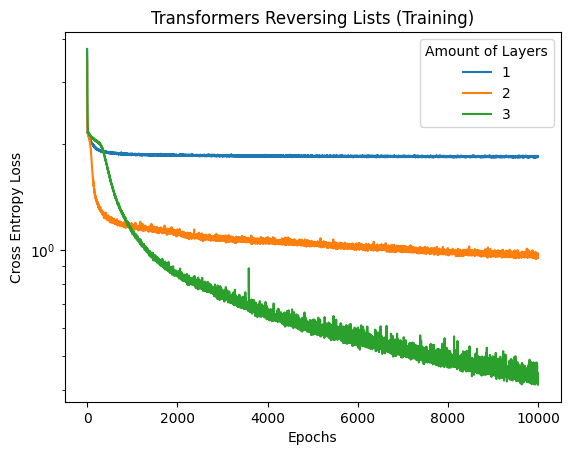

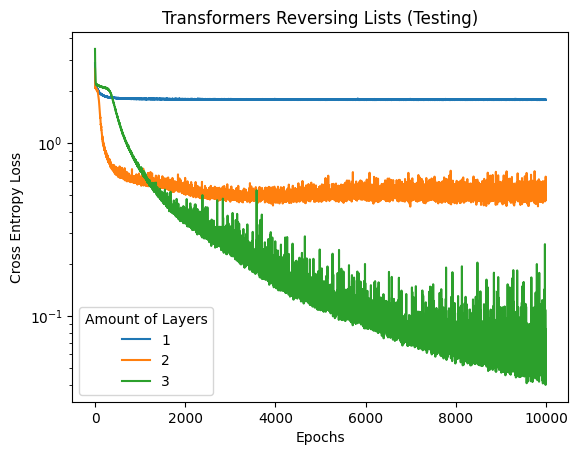

In [ ]:
#Training and testing for various layer amounts for Transformers

import matplotlib.pyplot as plt
plt.plot(np.arange(10000),TrainError1Layer,label=1)
plt.plot(np.arange(10000),TrainError2Layer,label=2)
plt.plot(np.arange(10000),TrainError3Layer,label=3)
plt.title("Transformers Reversing Lists (Training)")
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend(title="Amount of Layers")
plt.yscale('log')
plt.savefig("ReverseListTrain.png")
plt.show()


plt.plot(np.arange(10000),TestError1Layer,label=1)
plt.plot(np.arange(10000),TestError2Layer,label=2)
plt.plot(np.arange(10000),TestError3Layer,label=3)
plt.title("Transformers Reversing Lists (Testing)")
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend(title="Amount of Layers")
plt.yscale('log')
plt.savefig("ReverseListTest.png")
plt.yscale('log')

### Graphs for Reversing List (Varying Optimizers)

Below are the graphs for Chapter 5 studying effectivity of different optimizers on the problem.

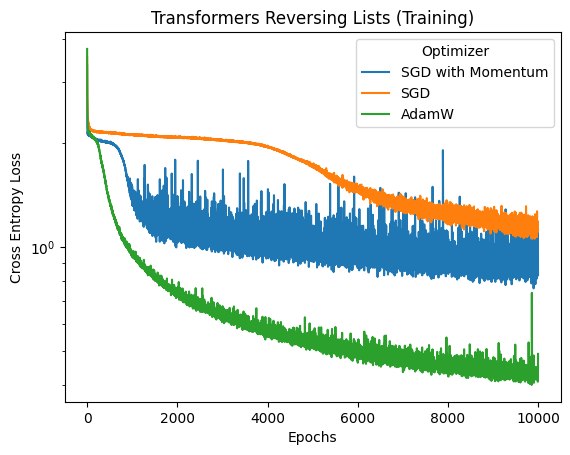

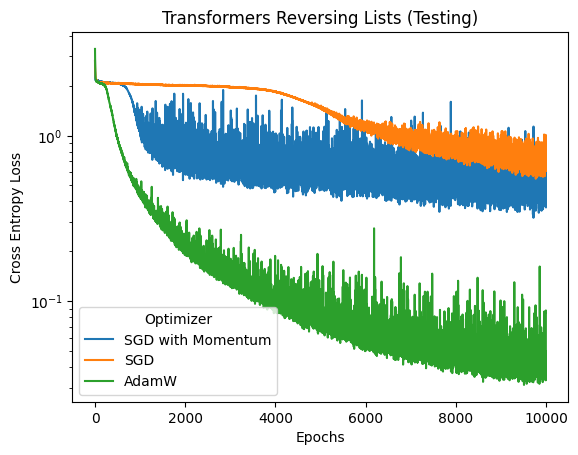

In [ ]:
#Code for plotting training and testing for each optimizer on a 3 layered Transformer.
import matplotlib.pyplot as plt

#Load Data
TestError3LayerSGDM005=np.load("TestError3LayerSGDM005.npy")
TrainError3LayerSGDM005=np.load("TrainError3LayerSGDM005.npy")
TestError3LayerW=np.load("TestError3LayerW.npy")
TrainError3LayerW=np.load("TrainError3LayerW.npy")
TrainError3LayerSGD = np.load("TrainError3LayerSGD.npy")
TestError3LayerSGD = np.load("TestError3LayerSGD.npy")


plt.plot(np.arange(10000),TrainError3LayerSGDM005,label='SGD with Momentum')
plt.plot(np.arange(10000),TrainError3LayerSGD,label='SGD')
plt.plot(np.arange(10000),TrainError3LayerW,label='AdamW')
plt.title("Transformers Reversing Lists (Training)")
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend(title="Optimizer")
plt.yscale('log')
plt.savefig("ReverseListTrainOptimizers.png")
plt.show()


plt.plot(np.arange(10000),TestError3LayerSGDM005,label='SGD with Momentum')
plt.plot(np.arange(10000),TestError3LayerSGD,label='SGD')
plt.plot(np.arange(10000),TestError3LayerW,label='AdamW')
plt.title("Transformers Reversing Lists (Testing)")
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend(title="Optimizer")
plt.yscale('log')
plt.savefig("ReverseListTestOptimizers.png")
plt.yscale('log')

### Graphs for List Reversal (Varying Heads)

Below are the graphs showing the relatonships between approximation capabilities and how many heads the Transformer has.

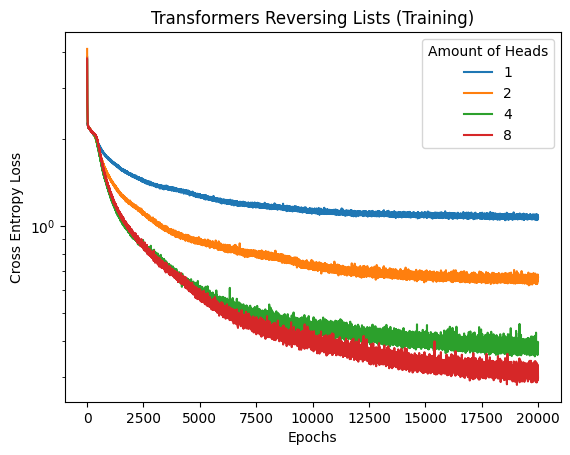

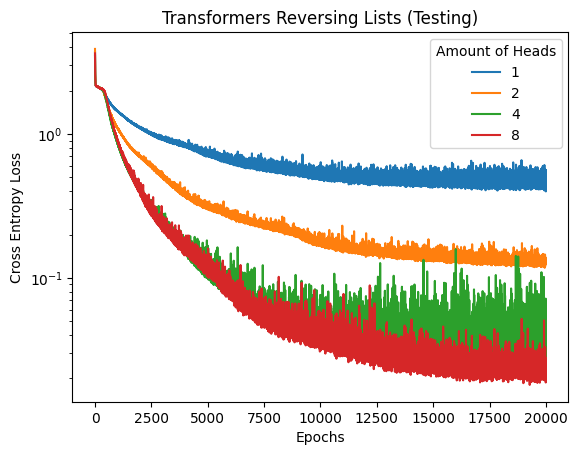

In [ ]:
import matplotlib.pyplot as plt

#Code for Plotting Transformer Performance with varying heads.

#Load Data
TestError3LayerW1=np.load("TestError3LayerW1.npy")
TrainError3LayerW1=np.load("TrainError3LayerW1.npy")
TestError3LayerW2=np.load("TestError3LayerW2.npy")
TrainError3LayerW2=np.load("TrainError3LayerW2.npy")
TestError3LayerW=np.load("TestError3LayerW.npy")
TrainError3LayerW=np.load("TrainError3LayerW.npy")
TestError3LayerW8=np.load("TestError3LayerW8.npy")
TrainError3LayerW8=np.load("TrainError3LayerW8.npy")

plt.plot(np.arange(20000),TrainError3LayerW1,label='1')
plt.plot(np.arange(20000),TrainError3LayerW2,label='2')
plt.plot(np.arange(20000),TrainError3LayerW,label='4')
plt.plot(np.arange(20000),TrainError3LayerW8,label='8')
plt.title("Transformers Reversing Lists (Training)")
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend(title="Amount of Heads")
plt.yscale('log')
plt.savefig("ReverseListTrainHeads.png")
plt.show()


plt.plot(np.arange(20000),TestError3LayerW1,label='1')
plt.plot(np.arange(20000),TestError3LayerW2,label='2')
plt.plot(np.arange(20000),TestError3LayerW,label='4')
plt.plot(np.arange(20000),TestError3LayerW8,label='8')
plt.title("Transformers Reversing Lists (Testing)")
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend(title="Amount of Heads")
plt.yscale('log')
plt.savefig("ReverseListTestHeads.png")
plt.yscale('log')

In [40]:
#with sdpa_kernel([SDPBackend.MATH]):
model = SimpleTransformer(vocab_size,d_model=2,ff=8,nhead=1,num_layers=2).to(device)
e=0
amount=0
for batch in dataloader1:
    inputs, targets = batch
    inputs, targets = inputs.to(device), targets.to(device)
    optimizer.zero_grad()  # Fixed typo here.
    outputs = model(inputs)
    loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
    loss.backward()
    optimizer.step()
    model.eval()

    inputs,targets=next(iter(dataloader1))
    inputs,targets=inputs.to(device),targets.to(device)
    outputs=model(inputs)
    loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
    e+=1
    if e==amount:
        break
